## Numeryczne Rozwiązywanie Równań Różniczkowych Cząstkowych
### Uniwersytet Jagielloński 2021
Katedra Teorii Optymalizacji i Sterowania UJ

# Metoda różnic skończonych

## Laboratorium III
### Równanie hiperboliczne

$$ u_{tt} = u_{xx} \,\,\,\,\,\, x \in (0, 1), \,\,\,\, t > 0 $$

$$ u(t, 0) = u(t, 1) = 0 \,\,\,\,\,\, t>0 $$

$$ u(0, x) = \frac{1}{8}\sin(\pi x) \,\,\,\,\,\, x \in [0, 1] $$

$$ u_{t}(0, x) = 0 \,\,\,\,\,\, x \in [0, 1] $$

Rozwiązanie dokładne: $$ u(t, x) = \frac{1}{8}\sin(\pi x)\cos(\pi t) $$

In [1]:
import numpy as np
import scipy as sc
import scipy.sparse.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.sparse import lil_matrix, csr_matrix
from typing import Optional
import time

In [40]:
class SetupHyperbolic:
    def __init__(self, 
                 dx: float, 
                 dt: Optional[float] = None,
                 output_freq: Optional[int] = 10,
                 alpha: float = 0.5
                 ):
        self.x_range = (0.0, 1.0)
        self.t_range = (0.0, 2.0)
        self.boundary_condition = (lambda t: 0.0, lambda t: 0.0)

        self.alpha = alpha 
        dt = dt or dx ** 2
        # There are 2 hard problems in computer science:
        # cache invalidation, naming things, and off-by-1 errors.
        self.x_num = round((self.x_range[1] - self.x_range[0]) / dx) + 1
        self.t_num = round((self.t_range[1] - self.t_range[0]) / dt) + 1

        self.X, self.dx = np.linspace(*self.x_range, self.x_num, retstep=True)
        self.T, self.dt = np.linspace(*self.t_range, self.t_num, retstep=True)
        
        self.output_freq = output_freq

    @staticmethod
    def initial(x):
        return 0.125 * np.sin(np.pi * x)

    @staticmethod
    def initial_der(x):
        return 0

    @staticmethod
    def exact(t, x):
        return 0.125 * np.sin(np.pi * x) * np.cos(np.pi * t)

In [41]:
def create_matrices(setup):
    u = np.empty(setup.x_num)
    A = None

    # TODO

    return A, u


def create_RH(u, u_prev, setup):
    d = np.zeros(setup.x_num - 2)
    r = setup.dt ** 2 / setup.dx ** 2

    # TODO

    return d


def fictional(x, setup):
    pass


def scheme_hyperbolic(setup):
    u_matrix = np.zeros((setup.x_num, setup.t_num // setup.output_freq))
    A, u = create_matrices(setup)
    u_prev = np.zeros_like(u)
    for i, xi in enumerate(setup.X):
        u_prev[i] = fictional(xi, setup)
    for t in range(setup.t_num - 1):
        d = create_RH(u, u_prev, setup)

        # TODO

        if (t-1) % setup.output_freq == 0:
            u_matrix[:, (t-1) // setup.output_freq] = u[:]
        
    return u_matrix

In [42]:
%%time
# numerical solution
setup_hyperbolic = SetupHyperbolic(0.0001, 0.001)
numerical_hyperbolic = scheme_hyperbolic(setup_hyperbolic)

CPU times: user 11.4 s, sys: 425 ms, total: 11.9 s
Wall time: 11.8 s


In [43]:
def plot_surface(values, setup):
    pass # TODO

In [44]:
# exact solution
X = np.linspace(*setup_hyperbolic.x_range, setup_hyperbolic.x_num)
T = np.linspace(*setup_hyperbolic.t_range, setup_hyperbolic.t_num // setup_hyperbolic.output_freq)
X, T = np.meshgrid(X, T)
exact_hyperbolic = setup_hyperbolic.exact(T, X).T

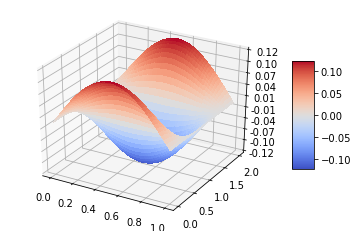

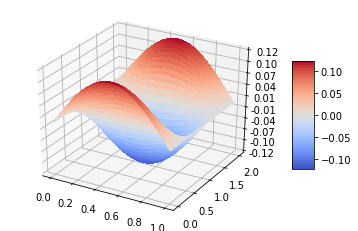

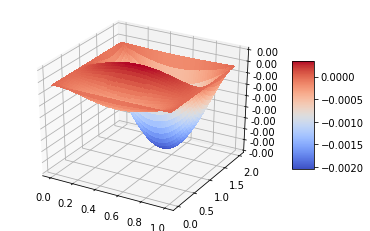

In [45]:
plot_surface(numerical_hyperbolic, setup_hyperbolic)
plot_surface(exact_hyperbolic, setup_hyperbolic)
plot_surface(numerical_hyperbolic - exact_hyperbolic, setup_hyperbolic)

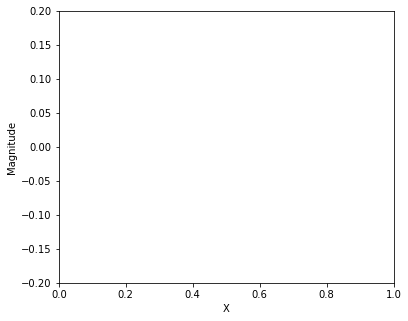

In [46]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a figure and axes
fig = plt.figure(figsize=(6,5))
ax1 = plt.subplot(1,1,1)   
# ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(setup_hyperbolic.x_range)            
ax1.set_ylim((-0.2, 0.2))
ax1.set_xlabel('X')
ax1.set_ylabel('Magnitude')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'orange', lw=2)     # ax.plot returns a list of 2D line objects

In [47]:
# animation function. This is called sequentially
def drawframe(n):
    x = setup_hyperbolic.X
    y = numerical_hyperbolic[:, n]
    line1.set_data(x, y)
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,)

In [48]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
interval=setup_hyperbolic.t_range[1] * 1000 // numerical_hyperbolic.shape[1]
anim = animation.FuncAnimation(fig, drawframe, frames=numerical_hyperbolic.shape[1], interval=interval, blit=True)

In [49]:
from IPython.display import HTML
HTML(anim.to_html5_video())